In [1]:
from qiskit import QuantumCircuit, ClassicalRegister, Aer, transpile
from qiskit.visualization import plot_circuit_layout
from qiskit.providers.fake_provider import FakeVigo, FakeAuckland, FakeTokyo, FakeRueschlikon, FakeGuadalupeV2, FakeParisV2, FakeMumbaiV2, FakeMontrealV2
from tqdm import tqdm
import matplotlib.pyplot as plt
backend = FakeVigo()

Original depth: 7


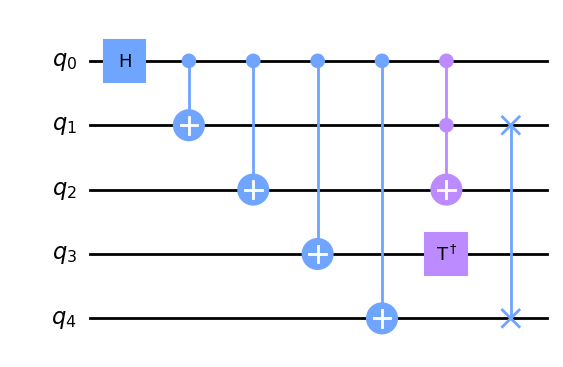

In [65]:
qc = QuantumCircuit(5)
qc.h(0)
qc.cx(0, range(1,5))
qc.ccx(0,1,2)
qc.swap(1,4)
qc.tdg(3)
print(f'Original depth: {qc.depth()}')

qc.draw(output='mpl')

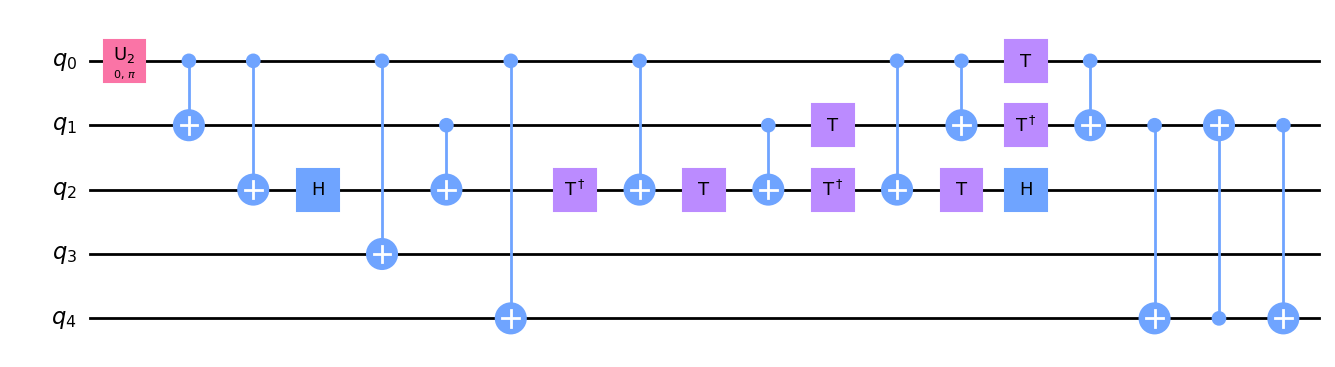

In [4]:
qc = qc.decompose()
qc.draw(output='mpl')

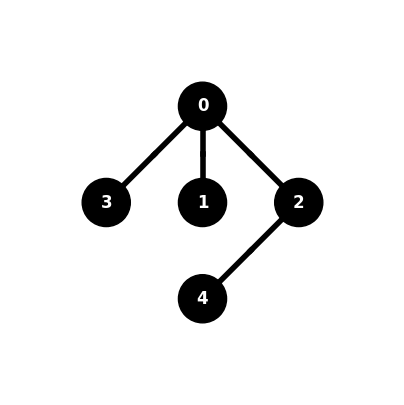

In [13]:
new_qc = transpile(qc, backend=backend, optimization_level=3, scheduling_method='asap')
plot_circuit_layout(new_qc, backend)

Final depth: 35


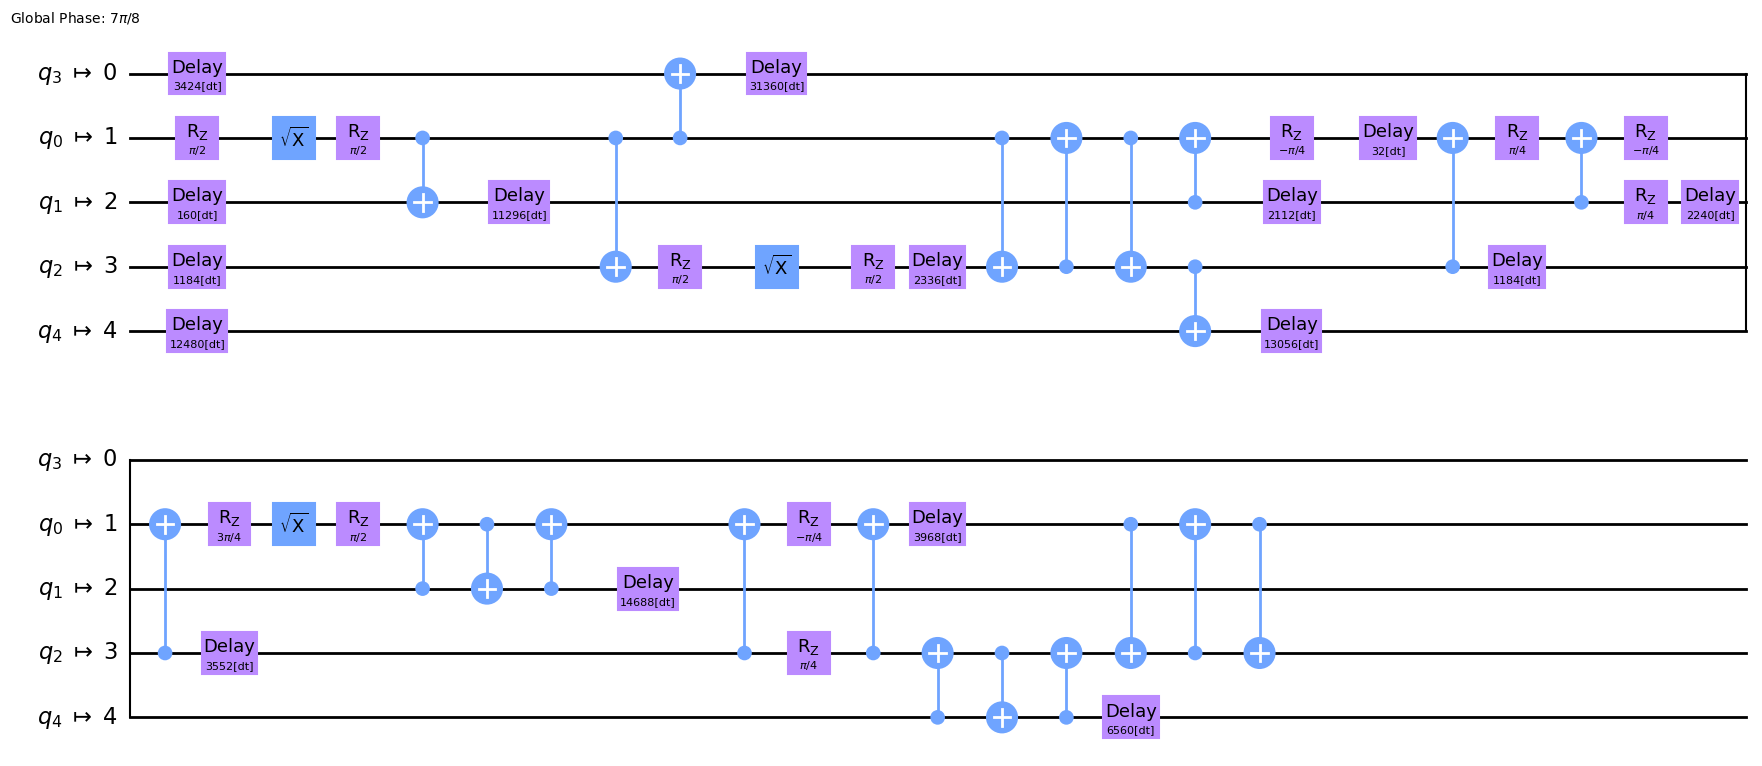

In [14]:
print(f'Final depth: {new_qc.depth()}')
new_qc.draw(output='mpl')

Original depth: 14


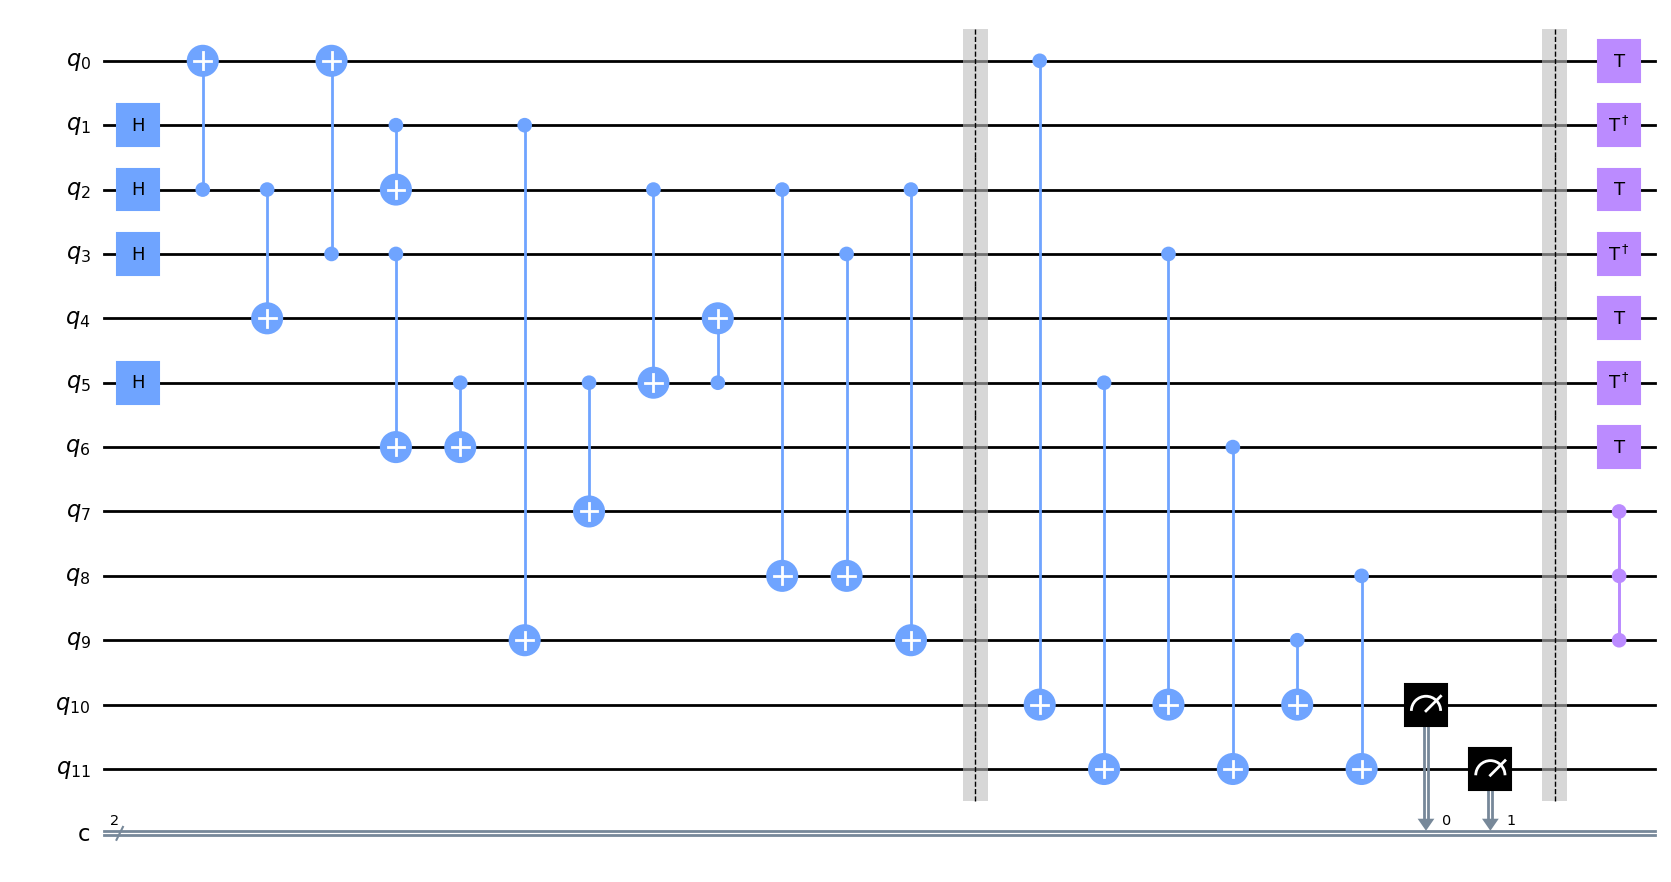

In [88]:
ancila_ed = ClassicalRegister(2)
qc10 = QuantumCircuit(12,2)

# preparation logical |+>
qc10.h([1,2,3,5])
qc10.cx(2, [0,4])
qc10.cx(3, 0)
qc10.cx(1, 2)
qc10.cx(3, 6)
qc10.cx(5, [6,7])
qc10.cx(2, 5)
qc10.cx(5, 4)
qc10.cx(2, 8)
qc10.cx(3, 8)
qc10.cx(1, 9)
qc10.cx(2, 9)

qc10.barrier()

# ED (error detection)
qc10.cx([0,3,9], 10)
qc10.cx([5,6,8], 11)
qc10.measure([10, 11], [0, 1])

qc10.barrier()

# logical T-gate
qc10.t([0,2,4,6])
qc10.tdg([1,3,5])
qc10.ccz(7,8,9)

# qc10.measure_all()

print(f'Original depth: {qc10.depth()}')
qc10.draw('mpl')

In [68]:
logical_0 = ['1100011101', '0011011001', '0110110010', '0101101011', '1001110110', '1111000100', '1010101111', '0000000000']
logical_1 = ['1010010011', '1100100001', '0011100101', '1001001010', '0101010111', '0000111100', '1111111000', '0110001110']

shots_num = 1600
backend = Aer.get_backend('aer_simulator_statevector')
circuit_transpiled = transpile(qc10, backend)
job = backend.run(circuit_transpiled, shots=shots_num, dynamic=True)

result = job.result().get_counts(qc10)
# print(list(result.keys())[0][::-1][:10])

arr = [elem[::-1][:10] for elem in list(result.keys())]
arr_unik_keys = list(set(arr))
arr_values = list(result.values())
arr_unik_values = []
for elem in arr_unik_keys:
    if (elem not in logical_0) and (elem not in logical_1):
        print("Not logical +")
    suma = 0
    suma = sum(val for key, val in zip(arr, arr_values) if key == elem)
    arr_unik_values.append(suma)
state_prob = dict(zip(arr_unik_keys, arr_unik_values))
print(state_prob)


# plt.figure(figsize=(20,5))
# plt.bar(arr_unik_keys, arr_unik_values)

{'1010010011': 98, '1100011101': 96, '1001110110': 100, '0110110010': 100, '1111111000': 113, '0101010111': 99, '0011100101': 107, '0011011001': 99, '0000111100': 98, '0110001110': 99, '1111000100': 101, '0101101011': 110, '1010101111': 105, '0000000000': 100, '1001001010': 91, '1100100001': 84}


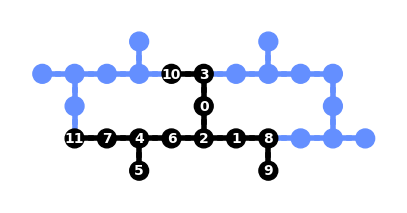

In [125]:
# Fake_backends = {FakeTokyo (20-qub), FakeAuckland (27-qub), FakeParisV2 (27-qub), FakeRueschlikon (16-qub), FakeGuadalupeV2 (16-qub)}
backend1 = FakeAuckland()
new_qc10 = transpile(qc10, backend=backend1, optimization_level=3, scheduling_method="asap")
plot_circuit_layout(new_qc10, backend1)

Final depth: 70


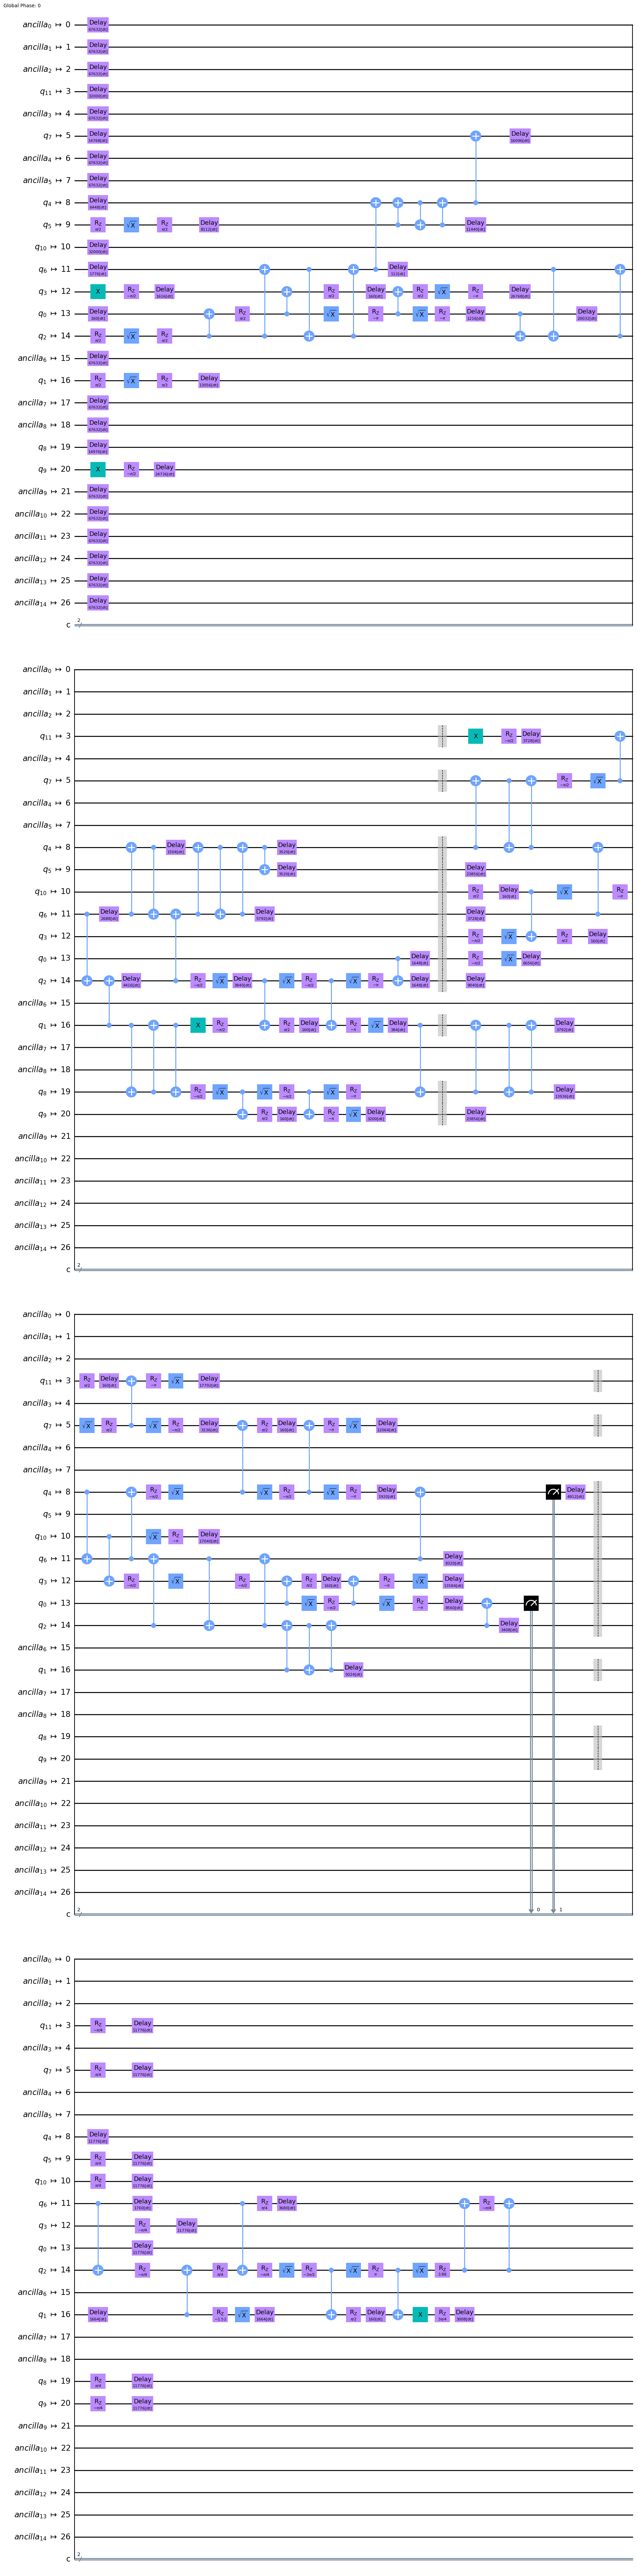

In [126]:
print(f'Final depth: {new_qc10.depth()}')
new_qc10.draw(output='mpl')

In [127]:
# optimization

opt_qc10 = transpile(qc10, backend=backend1, optimization_level=3, scheduling_method='asap')
print(opt_qc10.depth())
for _ in tqdm(range(100)):
    temp = transpile(qc10, backend=backend1, optimization_level=3, scheduling_method='asap')
    if temp.depth() < opt_qc10.depth():
        opt_qc10 = temp

print(opt_qc10.depth())

70


100%|██████████| 100/100 [00:43<00:00,  2.29it/s]

63


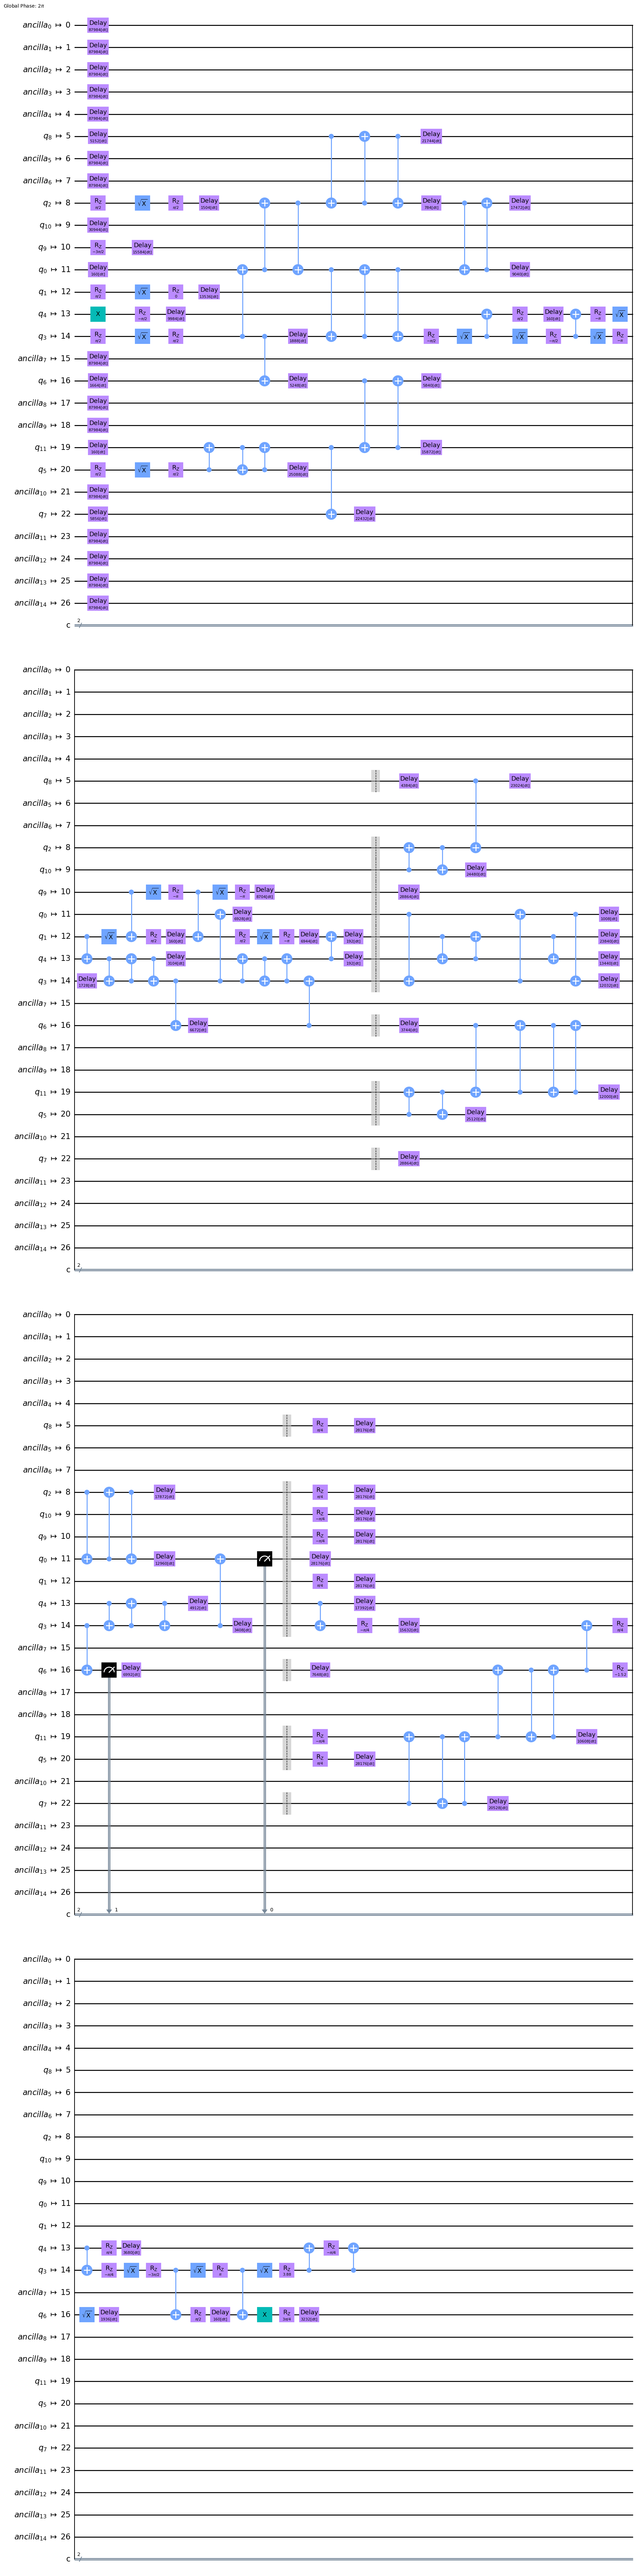

In [128]:
opt_qc10.draw(output='mpl')

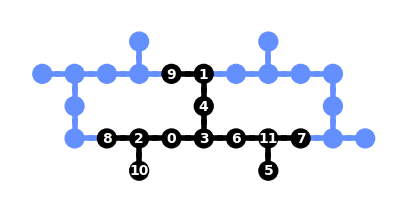

In [129]:
plot_circuit_layout(opt_qc10, backend1)

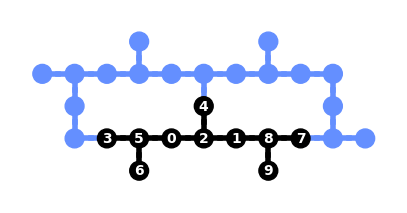

In [12]:
plot_circuit_layout(opt_qc10, backend1)